In [3]:
import cv2 
import mediapipe
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATADIR = 'train'
CATEGORIES = ["Bye", "Hello", "Hey","lol", "welcome", "thanks"]

IMG_SIZE = 80

training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        classNum = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.flip(img_array, 1)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)  )
            training_data.append([new_array, classNum])


2


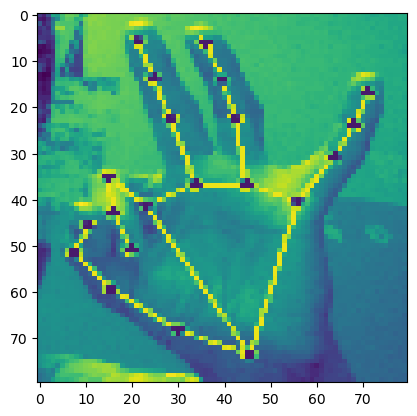

2


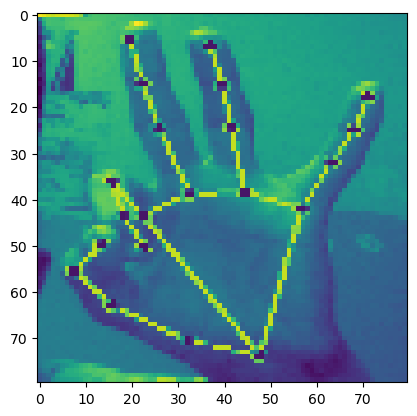

2


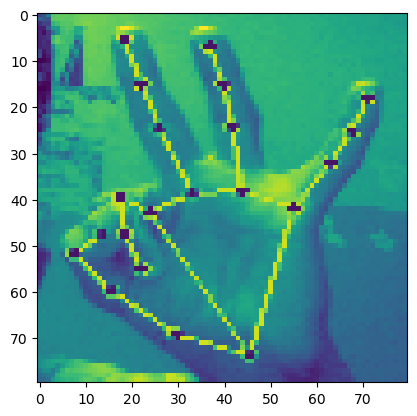

5


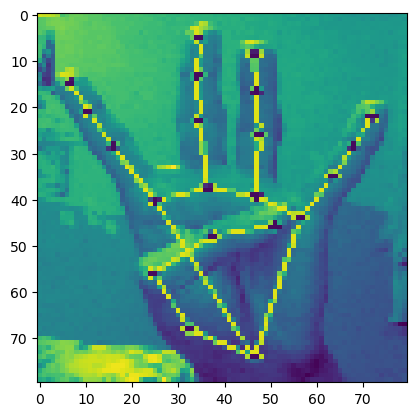

2


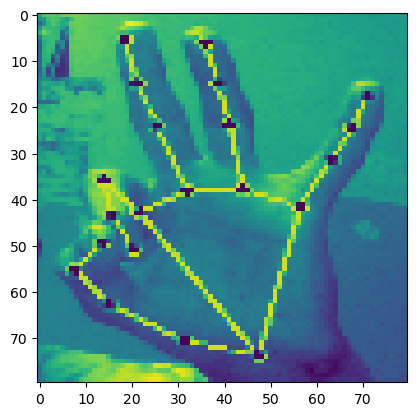

3


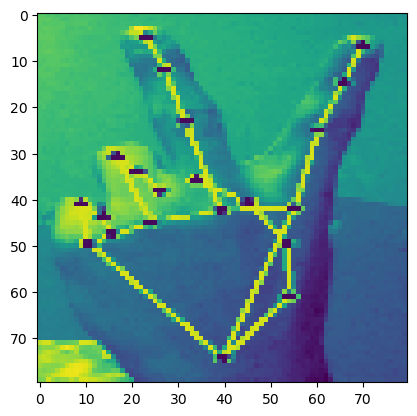

0


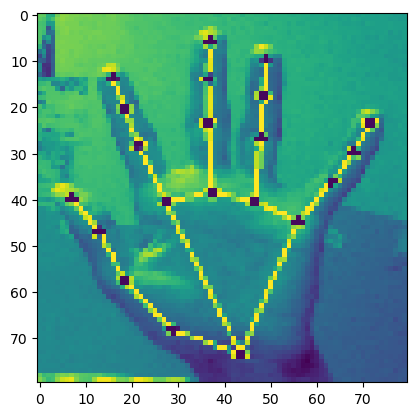

1


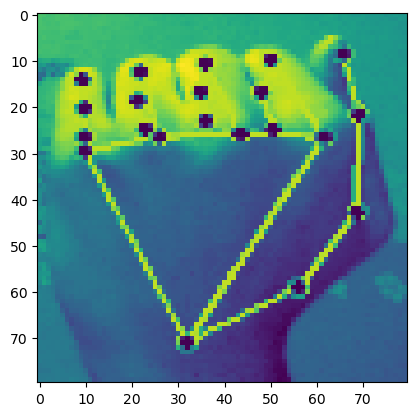

0


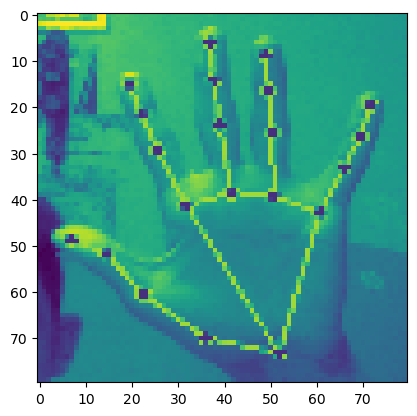

3


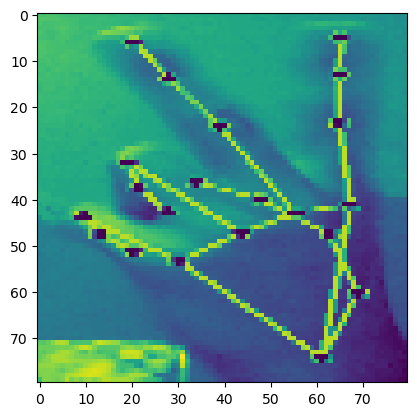

In [4]:

create_training_data()
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()

X = []
y = []

for features, label in training_data:
    X.append(features / 255.0)
    y.append(label)

if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    X = np.array(X)
    y = np.array(y)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(6,activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(f'X : {len(X)}')
print(f'Y : {len(y)}')


c:\Users\ALIENWARE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


X : 600
Y : 600


In [6]:

model.fit(X_train, y_train, epochs=20,batch_size=32)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.3627 - loss: 2.0046
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9310 - loss: 0.2451
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9604 - loss: 0.1535
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9674 - loss: 0.1218
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9756 - loss: 0.0548
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9930 - loss: 0.0201 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9987 - loss: 0.0049 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 7.5737e-04
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 1.0000 - loss: 9.5737e-04
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 1.0000 - loss: 2.6098e-04
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 1.0000 - loss: 4.4645e-04 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━

In [13]:
test = cv2.imread("./test/8.png", cv2.IMREAD_GRAYSCALE)
test = cv2.resize(test, (IMG_SIZE, IMG_SIZE))
test = (np.expand_dims(test, 0))
pre = model.predict(test)[0]
score = tf.nn.softmax(pre)



print(f'{CATEGORIES[np.argmax(pre)]}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Bye
